In [ ]:
import pandas as pd
df = pd.read_csv("pssi_tweet.csv")
df.head()

,Unnamed: 0,url,date,user,tweet,tweet_id,followers_count,friends_count,statuses_count,location,reply_count,retweet_count,like_count,mentioned_user
0,0,https://twitter.com/doatahun_ini/status/157441...,2022-09-26 14:47:57+00:00,doatahun_ini,@ygaSkip @ahmadrijani04 @iriawan84 @PSSI wkwkw...,1574410452456837120,48,316,3442,"Sragen, Surakarta 🇦🇹",0,0,0,ygaSkip
1,1,https://twitter.com/1jou_kun/status/1574410305...,2022-09-26 14:47:22+00:00,1jou_kun,@GOAL_ID Then you should put a match with even...,1574410305974964224,75,279,1319,"Tangerang, Banten",0,0,0,GOAL_ID
2,2,https://twitter.com/GOAL_ID/status/15744102194...,2022-09-26 14:47:02+00:00,GOAL_ID,Coach Shin Tae-yong bacanya goalindonesia 🔥👊🏼\...,1574410219467071488,2634823,492,446949,Indonesia,0,0,9,PSSI
3,3,https://twitter.com/great26_/status/1574410196...,2022-09-26 14:46:56+00:00,great26_,@sweetmedicinee @PSSI Biasanya 2-3 jam sebelum...,1574410196331307008,187,497,7844,"Bekasi, Jawa Barat",0,0,0,sweetmedicinee
4,4,https://twitter.com/Kotakmi1/status/1574410015...,2022-09-26 14:46:13+00:00,Kotakmi1,Ketua PSSI Tanggapi Shin Tae Yong Sering Jadi ...,1574410015175282688,7,14,3879,NaN,0,0,0,NaN


In [ ]:
#Check missing value

df.isna().sum()

Unnamed: 0             0
url                    0
date                   0
user                   0
tweet                  0
tweet_id               0
followers_count        0
friends_count          0
statuses_count         0
location           81146
reply_count            0
retweet_count          0
like_count             0
mentioned_user     37278
dtype: int64

In [ ]:
# Check duplicate

duplicate = df[df.duplicated()]
duplicate

,Unnamed: 0,url,date,user,tweet,tweet_id,followers_count,friends_count,statuses_count,location,reply_count,retweet_count,like_count,mentioned_user


In [ ]:
print("Maximum followers: ", df['followers_count'].max())
print("Maximum like: ", df['like_count'].max())
print("Maxim retweet",df['retweet_count'].max())
print("Maxim reply",df['reply_count'].max())

Maximum followers:  18998323
Maximum like:  103216
Maxim retweet 13330
Maxim reply 3528


In [ ]:
# # Locate Value

# dfInd = df.loc[df['location'] == "Indonesia"]
# df = dfInd

In [ ]:
#Menyimpan content

dataset = df["tweet"].tolist()
datasetLink = df['url'].tolist()
# datasetTitle = df['title'].tolist()
datasetDict = {}
for i in range(len(dataset)):
    datasetDict[i] = dataset[i]

In [ ]:
#datasetDict.keys()

In [ ]:
# Check float data inside the dictionary

for i in datasetDict.keys():
    if type(datasetDict[i]) == float:
        print(i)

In [ ]:
# Case folding
dataLower = {}
for i in datasetDict.keys():
    data = datasetDict[i]
    dataLower[i] = data.lower()


In [ ]:
# Menghapus seluruh emoji
# !pip install clean-text
# !pip install unicodedata2

from cleantext import clean

textNoEmoji = {}
for i in dataLower.keys():
    text_without_emoji = clean(dataLower[i], no_emoji=True)
    textNoEmoji[i] = text_without_emoji

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [ ]:
# Menghapus seluruh url

import re

textNoUrl = {}
for i in textNoEmoji.keys():
    text_without_url = re.sub(r'http\S+', '',textNoEmoji[i])
    textNoUrl[i] = text_without_url

In [ ]:
# Menghapus angka
import re

textNoNum = {}
for i in textNoUrl.keys():
    text_without_number = re.sub(r"\d+", "",textNoUrl[i])
    textNoNum[i] = text_without_number

In [ ]:
# Menghapus tanda baca
import string
tandaBaca = string.punctuation + "’" + "“" + "”"
noPuncData = {}

for i in textNoNum.keys():
    text_without_punctuation = textNoNum[i].translate(str.maketrans("","",tandaBaca))
    noPuncData[i] = text_without_punctuation


In [ ]:
#Splitted dict

splitDict = {}
for i in noPuncData.keys():
    tez1 = noPuncData[i].split(" ")
    splitDict[i] = tez1

In [ ]:
noNewline = {}

for i in splitDict.keys():
    res = []
    for n in splitDict[i]:
        res.append(n.replace("\n", " "))
        noNewline[i] = res
#         res.clear()

In [ ]:
# Join text untuk strip
joinDict = {}
for i in noNewline.keys():
    joined = " ".join(noNewline[i])
    joinDict[i] = joined

In [ ]:
# Menghapus white space

noWhiteSpace = {}

for i in joinDict.keys():
    text_without_whiteSpace = joinDict[i].strip()
    noWhiteSpace[i] = text_without_whiteSpace
noWhiteSpace

{0: 'ygaskip ahmadrijani iriawan pssi wkwkwkk ya jelas',
 1: 'goalid then you should put a match with even more better nation with better national team like japan or australia to prove that our national team have made a good progress dear pssi',
 2: 'coach shin taeyong bacanya goalindonesia mantap coach salam goal pssi',
 3: 'sweetmedicinee pssi biasanya  jam sebelum kickoff',
 4: 'ketua pssi tanggapi shin tae yong sering jadi bintang iklan cnn indonesia google berita olahraga  arenanews',
 5: 'updatebolabola indonesia butuh sekjend pssi standart fifa',
 6: 'garagarabola standard nggak pssi',
 7: 'syarifntoke pssi stadion pakansari memang keren bisa buat latihan renang pemain timnas',
 8: 'riza mirhibim updatebolabola kalo nonton channelnya emang sering kritik pssi padahal dulu pernah jadi orang pssi jaman dualisme gak terlalu keliatan',
 9: 'ohkick idextratime pssi gratis pasti nontonnya',
 10: 'ciumbrella panjat tebing atau angkat besi aja wkwk tapi kalau sepakbola yang salah udah pa

# TOKENIZATION

In [ ]:
# tokenize isi dictionary untuk stopword removal
from nltk.tokenize import sent_tokenize, word_tokenize
splitDict_for_stopword = {}

for i in noWhiteSpace.keys():
    split = noWhiteSpace[i].split(" ")
    splitDict_for_stopword[i] = split

In [ ]:
#Menghapus empty character ("")
for i in splitDict_for_stopword.keys():
    while("" in splitDict_for_stopword[i]) :
        splitDict_for_stopword[i].remove("")

In [ ]:
#splitDict_for_stopword

In [ ]:
from nltk.corpus import stopwords

f = open("sw_Indo.txt", "r")
stopword_list = []
for line in f:
  stripped_line = line.strip()
  line_list = stripped_line.split()
  stopword_list.append(line_list[0])
f.close()
len(stopword_list)

871

In [ ]:
# Stopword removal Indonesia

listStopwordId = set(stopwords.words('indonesian'))
listStopwordEn = set(stopwords.words('english'))
listStopwordEn.add("im")
#tokens_without_sw = [word for word in splitDict_for_stopword if not word in stopword_list]

DictOfRemovedStopword = {}

for a in splitDict_for_stopword.keys():
    remove = []
    for i in splitDict_for_stopword[a]:
        if i not in listStopwordId:
            if i not in listStopwordEn:
              if i not in stopword_list:
                remove.append(i)

    DictOfRemovedStopword[a] = " ".join(remove)

DictOfRemovedStopword


{0: 'ahmadrijani iriawan',
 1: 'goalid put match even better nation better national team like japan australia prove national team made good progress dear',
 2: 'coach shin taeyong bacanya goalindonesia mantap coach salam goal',
 3: 'sweetmedicinee jam kickoff',
 4: 'tanggapi shin tae yong bintang iklan cnn indonesia google berita olahraga arenanews',
 5: 'updatebolabola indonesia butuh sekjend standart fifa',
 6: 'garagarabola standard',
 7: 'syarifntoke stadion pakansari keren latihan renang pemain timnas',
 8: 'riza mirhibim updatebolabola nonton channelnya kritik orang jaman dualisme keliatan',
 9: 'ohkick idextratime gratis nontonnya',
 10: 'ciumbrella panjat tebing angkat besi sepakbola salah',
 11: 'check latest openings teampssi pssicareers',
 12: 'mafiawasit sak lawas uraaaaaa',
 13: 'semangt bt timnas bsok',
 14: 'mafiawasit semoga jabar terbukti berkat beliau timnas progres',
 15: 'duit pribadi plt motifnya beli tiket dibagi urusan ngapaij urusan pemda ngapain urusan plt bupa

In [ ]:
## Stemming dengan bahasa Indonesia
#from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

#factory = StemmerFactory()
#stemmer = factory.create_stemmer()

#hasilText = {}
#for i in DictOfRemovedStopword.keys():
    # hasil = stemmer.stem(DictOfRemovedStopword[i])
    # hasilText[i] = hasil
#hasilText

In [ ]:
# Membuat clean dataframe
cleaned = pd.DataFrame(DictOfRemovedStopword.items(), columns=['index', 'cleaned_content'])
cleaned['cleaned_content']

0                                       ahmadrijani iriawan
1         goalid put match even better nation better nat...
2         coach shin taeyong bacanya goalindonesia manta...
3                                sweetmedicinee jam kickoff
4         tanggapi shin tae yong bintang iklan cnn indon...
                                ...                        
199995    sempet sempetnya postin iklan sponsor memeng d...
199996                             jrpalalongan kelas hahah
199997    donkim dibilang klau gimana pilih pemain buruk...
199998    donkim salah penonton terima kalah menangnya i...
199999                    guyonwaton lan krocone resiki sik
Name: cleaned_content, Length: 200000, dtype: object

In [ ]:
# Menggabungkan dataframe awal dengan clean
df_clean = df
df_clean = df_clean.join(cleaned['cleaned_content'])

# Wordcloud

In [ ]:
# String untuk wordcloud

hasilText = DictOfRemovedStopword

totalList = []
for i in hasilText.keys():
    totalList.append(hasilText[i])

totalString = " ".join(totalList)

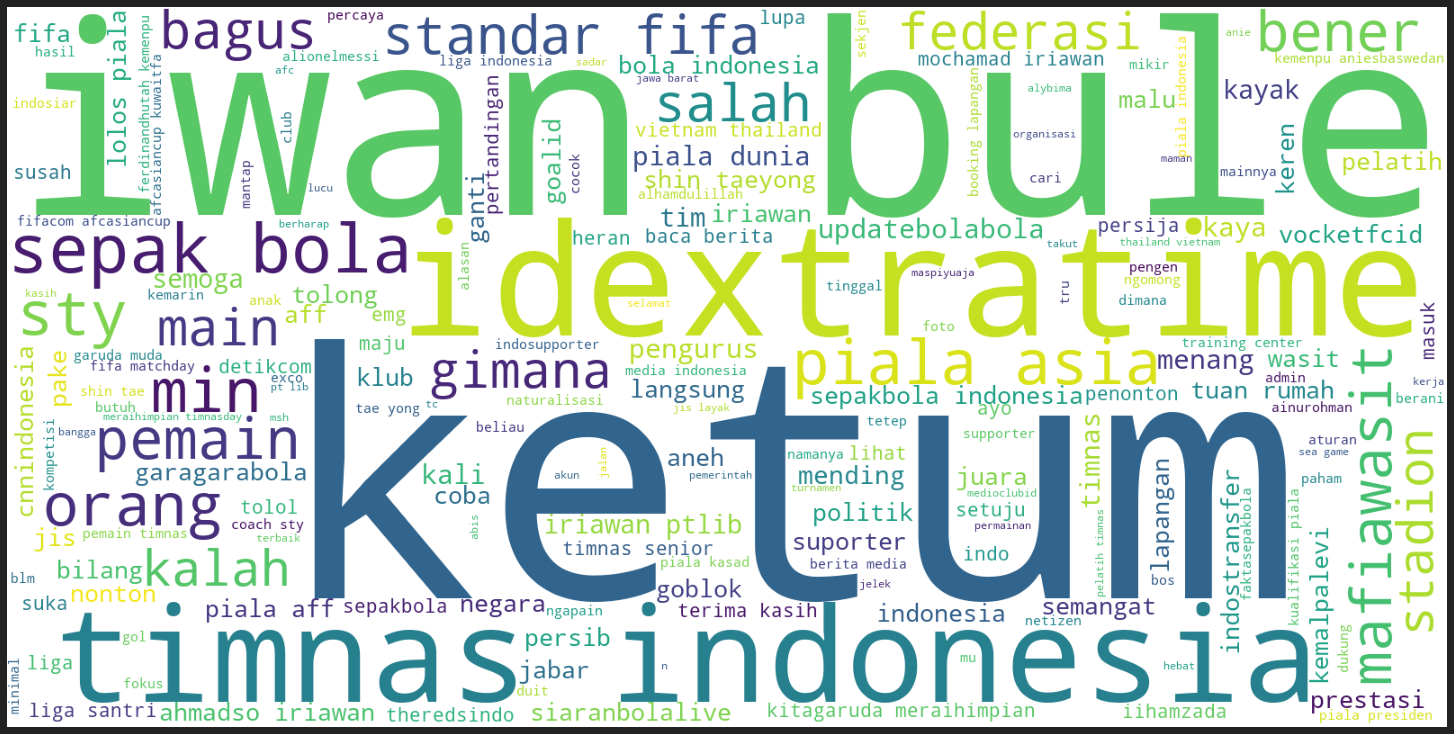

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

# create wordcloud
wordcloud = WordCloud(width = 1600, height = 800,
background_color ='white',
min_font_size = 10).generate(totalString)
# plot the WordCloud image
plt.figure(figsize = (20, 10), facecolor = 'k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
#Tokenizing

#import word_tokenize dari nltk
import nltk
from nltk.tokenize import word_tokenize

tokens = nltk.tokenize.word_tokenize(totalString)

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

kemunculan = nltk.FreqDist(tokens)
kemunculan

FreqDist({'timnas': 18888, 'indonesia': 18667, 'ketum': 11011, 'iriawan': 10477, 'liga': 10013, 'piala': 9645, 'fifa': 9643, 'pemain': 9130, 'bola': 8796, 'jis': 7837, ...})

In [ ]:
kemunculan2 = dict((k, v) for k, v in kemunculan.items() if v >= 2500)
kemunculan2

{'iriawan': 10477,
 'indonesia': 18667,
 'updatebolabola': 2769,
 'fifa': 9643,
 'stadion': 7262,
 'pemain': 9130,
 'timnas': 18888,
 'orang': 5197,
 'idextratime': 7504,
 'sepakbola': 5515,
 'salah': 3047,
 'mafiawasit': 4176,
 'semoga': 2598,
 'jabar': 2793,
 'bagus': 3369,
 'pelatih': 4235,
 'main': 5489,
 'pertandingan': 3114,
 'sty': 6929,
 'klub': 3323,
 'min': 3611,
 'vietnam': 3345,
 'iwan': 6955,
 'bule': 6000,
 'ketum': 11011,
 'standar': 6106,
 'jis': 7837,
 'bola': 8796,
 'tim': 4299,
 'federasi': 2993,
 'sepak': 3828,
 'dunia': 3138,
 'masuk': 3015,
 'bener': 3003,
 'kalah': 3438,
 'lawan': 3473,
 'wasit': 3923,
 'liga': 10013,
 'aff': 6104,
 'garuda': 2617,
 'lapangan': 3669,
 'politik': 3987,
 'menang': 4276,
 'juara': 3936,
 'lolos': 3377,
 'piala': 9645,
 'asia': 4287,
 'timnasday': 3218,
 'ptlib': 4925,
 'afcasiancup': 2655}

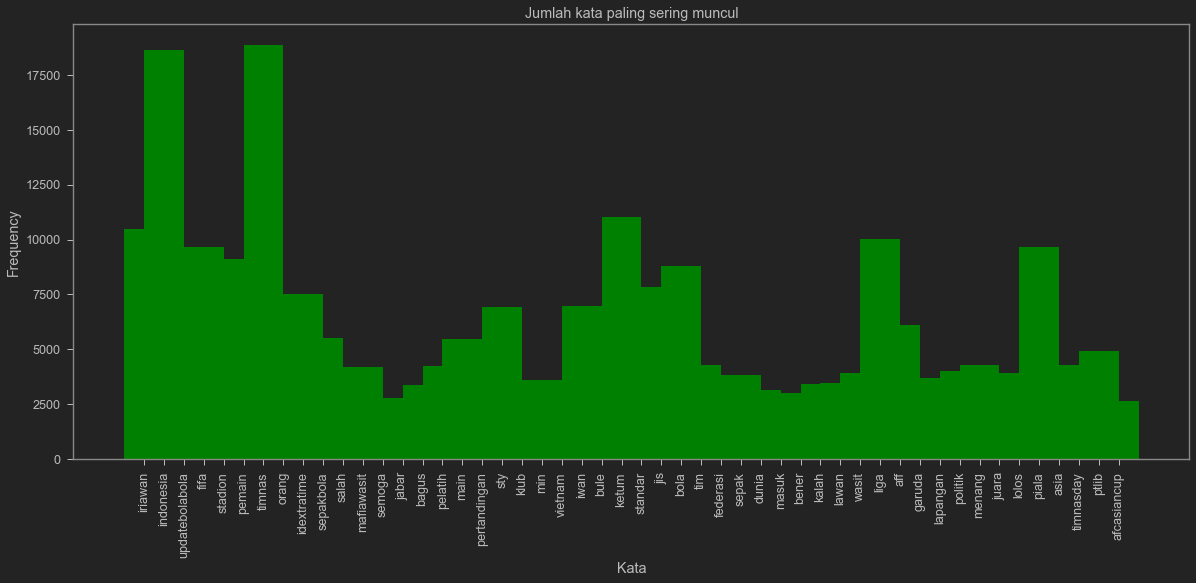

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
courses = list(kemunculan2.keys())
values = list(kemunculan2.values())
  
fig = plt.figure(figsize = (20, 8))
 
# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 2)

plt.xticks(rotation=90)
plt.xlabel("Kata")
plt.ylabel("Frequency")
plt.title("Jumlah kata paling sering muncul")
plt.show()


# Clustering

In [ ]:
df.info(verbose=False, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 14 entries, Unnamed: 0 to mentioned_user
dtypes: int64(8), object(6)
memory usage: 132.9 MB


In [ ]:
tx = pd.DataFrame(hasilText, index = [0]).transpose()
tx[0]

0                                       ahmadrijani iriawan
1         goalid put match even better nation better nat...
2         coach shin taeyong bacanya goalindonesia manta...
3                                sweetmedicinee jam kickoff
4         tanggapi shin tae yong bintang iklan cnn indon...
                                ...                        
199995    sempet sempetnya postin iklan sponsor memeng d...
199996                             jrpalalongan kelas hahah
199997    donkim dibilang klau gimana pilih pemain buruk...
199998    donkim salah penonton terima kalah menangnya i...
199999                    guyonwaton lan krocone resiki sik
Name: 0, Length: 200000, dtype: object

In [ ]:
tx[0].to_csv('apaja.csv')

In [ ]:
tx.to_csv('klin.csv') 

In [ ]:
f = "klin.csv"

In [ ]:
nume_lines = sum(1 for i in open(f))
nume_lines

200001

In [ ]:
size = (nume_lines//1.1)
size = int(size)
size

181819

In [ ]:
import random
ids = random.sample(range(1, nume_lines), size)
len(ids)

181819

In [ ]:
df_random = pd.read_csv(f, skiprows = ids)
df_random = df_random['0']
df_random

0        tanggapi shin tae yong bintang iklan cnn indon...
1        updatebolabola indonesia butuh sekjend standar...
2                                    thelfadotcom acfutsal
3        kemahalanuntuk main pakansari harga keekonomia...
4                                           siaranbolalive
                               ...                        
18176             akukangcat mizzpikha rbgcah timnas bagus
18177    bilang butuh arhan butuh asnawi stoppp indones...
18178                                      camavinga ampun
18179                                     info wasit maseh
18180    indosupporter proses proses peler iriawan suru...
Name: 0, Length: 18181, dtype: object

In [ ]:
rand = df_random.fillna(' ')
tx = rand
tx

0        tanggapi shin tae yong bintang iklan cnn indon...
1        updatebolabola indonesia butuh sekjend standar...
2                                    thelfadotcom acfutsal
3        kemahalanuntuk main pakansari harga keekonomia...
4                                           siaranbolalive
                               ...                        
18176             akukangcat mizzpikha rbgcah timnas bagus
18177    bilang butuh arhan butuh asnawi stoppp indones...
18178                                      camavinga ampun
18179                                     info wasit maseh
18180    indosupporter proses proses peler iriawan suru...
Name: 0, Length: 18181, dtype: object

In [ ]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(tx)


In [ ]:
from sklearn.cluster import KMeans

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

In [ ]:
import numpy as np
a = np.zeros((200000, 23799), dtype='uint8')
a.nbytes

4759800000

In [ ]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [ ]:
# assign clusters and pca vectors to our dataframe 
tx['cluster'] = clusters
tx['x0'] = x0
tx['x1'] = x1

In [ ]:
import sklearn

def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
stadion,ptlib,mafiawasit,liga,jis,standar,fifa,ketum,iriawan,idextratime

Cluster 1
min,idextratime,foto,indonesia,terimakasih,berkat,timnas,ketum,bule,iwan

Cluster 2
senior,sepakbola,bola,sty,pemain,asia,aff,piala,indonesia,timnas


In [ ]:
# map clusters to appropriate labels 
cluster_map = {0: "Fasilitas", 1: "Pesan", 2: "Timnas"}
# apply mapping
#tx['cluster'] = tx['cluster'].map(cluster_map)

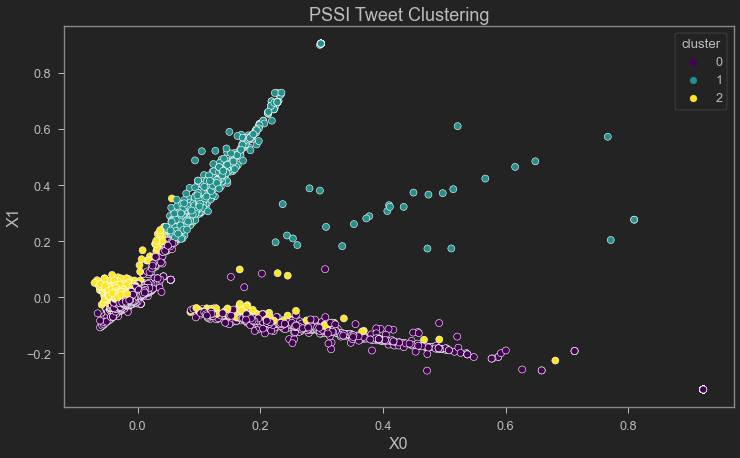

In [ ]:
import seaborn as sns
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("PSSI Tweet Clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=tx, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

# Social Network

In [ ]:
df_clean.isna().sum()

Unnamed: 0             0
url                    0
date                   0
user                   0
tweet                  0
tweet_id               0
followers_count        0
friends_count          0
statuses_count         0
location           81146
reply_count            0
retweet_count          0
like_count             0
mentioned_user     37278
cleaned_content        0
dtype: int64

In [ ]:
df_clean.keys()

Index(['Unnamed: 0', 'url', 'date', 'user', 'tweet', 'tweet_id',
       'followers_count', 'friends_count', 'statuses_count', 'location',
       'reply_count', 'retweet_count', 'like_count', 'mentioned_user',
       'cleaned_content'],
      dtype='object')

In [ ]:
# Data for gephi

dg = df_clean.drop(['location','Unnamed: 0'],axis=1)
dg2 = dg.dropna()
dg2

,url,date,user,tweet,tweet_id,followers_count,friends_count,statuses_count,reply_count,retweet_count,like_count,mentioned_user,cleaned_content
0,https://twitter.com/doatahun_ini/status/157441...,2022-09-26 14:47:57+00:00,doatahun_ini,@ygaSkip @ahmadrijani04 @iriawan84 @PSSI wkwkw...,1574410452456837120,48,316,3442,0,0,0,ygaSkip,ahmadrijani iriawan
1,https://twitter.com/1jou_kun/status/1574410305...,2022-09-26 14:47:22+00:00,1jou_kun,@GOAL_ID Then you should put a match with even...,1574410305974964224,75,279,1319,0,0,0,GOAL_ID,goalid put match even better nation better nat...
2,https://twitter.com/GOAL_ID/status/15744102194...,2022-09-26 14:47:02+00:00,GOAL_ID,Coach Shin Tae-yong bacanya goalindonesia 🔥👊🏼\...,1574410219467071488,2634823,492,446949,0,0,9,PSSI,coach shin taeyong bacanya goalindonesia manta...
3,https://twitter.com/great26_/status/1574410196...,2022-09-26 14:46:56+00:00,great26_,@sweetmedicinee @PSSI Biasanya 2-3 jam sebelum...,1574410196331307008,187,497,7844,0,0,0,sweetmedicinee,sweetmedicinee jam kickoff
5,https://twitter.com/cahangon1207/status/157440...,2022-09-26 14:45:49+00:00,cahangon1207,@UpdateBolabola Indonesia butuh sekjend PSSI s...,1574409915447156736,75,1624,4114,1,0,0,UpdateBolabola,updatebolabola indonesia butuh sekjend standar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,https://twitter.com/RizkyIk98120133/status/152...,2022-05-19 13:02:56+00:00,RizkyIk98120133,@PSSI Najis 😠,1527273602189381634,95,1685,8275,0,0,0,PSSI,najis
199996,https://twitter.com/giehazz/status/15272734260...,2022-05-19 13:02:14+00:00,giehazz,@jrpalalongan @PSSI tetap beda kelas memang hahah,1527273426045399042,689,538,38457,1,0,0,jrpalalongan,jrpalalongan kelas hahah
199997,https://twitter.com/dadsonme/status/1527273410...,2022-05-19 13:02:11+00:00,dadsonme,@donkim30 @PSSI Udah dibilang klau cuma itu yg...,1527273410841411585,18,54,1141,1,0,0,donkim30,donkim dibilang klau gimana pilih pemain buruk...
199998,https://twitter.com/ohhhpang/status/1527273306...,2022-05-19 13:01:46+00:00,ohhhpang,@donkim30 @PSSI Salah satu penonton yang ga te...,1527273306780758018,156,142,2541,0,0,1,donkim30,donkim salah penonton terima kalah menangnya i...


In [ ]:
# Dump data
dg2[['mentioned_user', 'user']].to_csv('PSSI_gephi.csv')